** Unsupervised learning in computational linguistics:

* K-mean clustering for similarity measures (DSCI 563, lab1)
* HMM unsupervised learning to estimate transition and observation probabilities (DSCI 563, lab2)
* Inside-outside algorithm to estimate  grammar production probabilities (COLX 535 Parsing, but beyond the scope)
* IBM alignment models for SMT to estimate lexical translation probabilities by word alignment (COLX 531 MT)

# DSCI 563 Lab Assignment 1: Similarity and Clustering (Cheat sheet)

## Assignment Objectives

In this assignment you will
- Use similarity measures to do spelling correction
- Cluster languages in the WALS language altas

## Getting Started

This assignment requires that you have downloaded following NLTK corpora/lexicons

In [1]:
import nltk
nltk.download("words")
nltk.download("brown")

[nltk_data] Downloading package words to /Users/jungyeul/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package brown to /Users/jungyeul/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

** If you have a following error during `nltk.download`: 
```
[nltk_data] Error loading words: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed
[nltk_data]     (_ssl.c:852)>
[nltk_data] Error loading brown: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed[nltk_data]     (_ssl.c:852)>
```

Then, try the following `import ssl`: 
```
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import nltk
nltk.download("words")
nltk.download("brown")
```

In [2]:
import sys
!{sys.executable} -m pip install levenshtein

Defaulting to user installation because normal site-packages is not writeable


Run the code below to access relevant modules (you can add to this as needed)

In [3]:
from collections import Counter
import Levenshtein
from nltk.corpus import brown,words
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
import urllib.request
import numpy as np
import scipy

## Tidy Submission

rubric={mechanics:1}

To get the marks for tidy submission:

- Submit the assignment by filling in this jupyter notebook with your answers embedded
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions)
- This is a paired lab - you and a teammate will be working together to find a solution.  To receive full marks, you must indicate which team member is responsible for each code section.  The other team-member must provide a short code review that describes how the code works.  You are free to divide the work however you see fit, but the team will marks if one team member is completing too much of the lab.
- Although the optional parts don't contain marks for code review, we still highly recommend it.  The more you get into the habit of doing regular code review, the easier it becomes.

### Exercise 1: Spelling correction

** Spelling correction in Python 

- `from autocorrect import Speller`
- `from spellchecker import SpellChecker`
- `from symspellpy import SymSpell, Verbosity`

(colab) https://colab.research.google.com/drive/1NFcW6R2ckDASne0xNxNoxMPk0lCOnKRs?usp=sharing

#### 1.1
rubric={accuracy:2, quality:1, peer-review:1}

One classic application of similarity measures, particularly string similarity measures, is spelling correction. Though context is useful for this, for this lab we'll do a simple version that considers only the misspelled word. 

First, you'll need to get some spelling errors. You can pull some common errors found on wikipedia [here](https://www.dcs.bbk.ac.uk/~ROGER/wikipedia.dat). A `$` prefix indicates a correct word, and list of common mistakes is appears below, before the next. Please don't save the data in a file. Your code should access that page directly, e.g. using the [requests](https://docs.python-requests.org/en/latest/user/quickstart/#response-content) module (you may need to install it first using pip or conda). 


** in `wikipedia.dat`:
```
...
$Athenian       <-- correct one
Athenean        <-- common mistake
$Athenians
Atheneans
$Bernoulli
Bernouilli
...
$acclimatization
acclimitization
$accommodate    <-- correct one
accomadate      <-- first common mistake
accomodate      <-- second common mistake
$accommodated
accomadated
accomodated
...
```

** `requests.get(URL).text.strip()`

Create a list of `(error, correct_word)` tuples, e.g. `("dgo", "dog")`. **You should only include pairs where the correct word appears in the NLTK English words list `nltk_en_words`**.

** Tuples: reading data is simpler when tuples are stored inside a list. For example, `[(2,4), (5,7), (3,8), (5,9)]` instead of `[[2,4], [5,7], [3,8], [5,9]]`.

In [4]:
nltk_en_words = list(words.words("en"))
test_set = []

# your code here 


In [5]:
### Review: 

Assertion to check that your code works.

In [6]:
assert len(test_set) == 1847
print("Success!")

Success!


#### 1.2
rubric={accuracy:2, peer-review:1}

Our first approach to spelling correction will be to represent words as a bag-of-character vectors, where each dimension correponds to a specific character like `"A"` or `"b"` and the values are counts of characters. 

For example, if you choose to represent character `A` in dimension 0 and `B` in dimension 1, then your representation vector `v` for the word `"BAB"`, should have: 

* `v[0] == 1`, 
* `v[1] == 2`, and 
* `v[i] == 0` for all other dimensions `i`.

Note that the built-in [ord function](https://docs.python.org/3/library/functions.html#ord) which converts a letter to a number, may come in handy. Since `ord("A") == 65`, `ord("z") == 122` and all other characters in the Latin alphabet have a numerical value between 65 and 122, we can use 58-dimensional vectors for our bag-of-character representations.

Please distinguish between upper and lower case characters in this assignment.

** `BOC_representation`:
```
print(BOC_representation("Happy"))

 A  ...               H
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

                         a                                            p
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.
 
                         y
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
```

In [30]:
def BOC_representation(word):
    # your code here


print(BOC_representation("Happy"))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [8]:
### Review

#### 1.3
rubric={accuracy:3,efficiency:2, peer-review:1}

Now, evaluate this representation by seeing how often it allows you to pick the right spelling from among the NLTK English words using suitable vector distance measures included in [scipy](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html). The correct answer should be the single most similar (least distant) word to the mispelled word to be considered correct. You should try out cosine similarity and at least one other measure for comparison. Print out the spelling correction accuracy for each distance measure. You should get over 30% for at least some of the measures. 

To accomplish this, you will have to compare every mispelled word with every correct one. The efficiency points here are primarily for speed: to get them, you need to make full use of vectorization, and you should build the BOC representation for each word only once. 

Start by building two 2-dimensional numpy arrays: 

1. `spelling_error_reps` of shape `(len(test_set), 58)` containing vector representations of the misspelled words, and 1. `nltk_word_reps` of shape `(len(en_nltk_words), 58)` containing all the words in `nltk_en_words`. 

Then use [scipy.spatial.distance.cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist)) to compute a matrix of shape `(len(test_set), len(nltk_en_words))` which contains all distances `dist(w,w')`, where `w` is a misspelled word and `w'` is a word in `nltk_en_words`. You can then use this matrix to find the correction with minimal distance to the mispelled word. 

**Note** this can take a while even if you do this as efficiently as possible.

In [35]:
# Use these to associate words with matrix dimensions
word2id = {w:i for i, w in enumerate(nltk_en_words)}
id2word = nltk_en_words

# your code here
from scipy.spatial.distance import cdist



metric: cosine, accuracy: 44.45
metric: euclidean, accuracy: 40.12
metric: jaccard, accuracy: 32.97
metric: hamming, accuracy: 36.22


In [10]:
### Review:

#### 1.4 optional 
rubric={accuracy:1}

Though tf-idf is typically used for words, we are going to try applying it here to characters. Use the list of English words to derive an idf measure for each character (ie, your *documents* are actually *words*), and then modify your representation function so it is tf-idf weighted (you must do this manually, using the equation from the lecture). Evaluate the result for your best distance measure from above (it is okay to copy and modify that code).

In [40]:
def tfidf_representation(word, idfs):
    # your code here

# your code here



print("metric: %s, accuracy: %.2f" % ("cosine", sum(min_ids == gold_word_ids) * 100 /len(min_ids)))

metric: cosine, accuracy: 40.39


In [36]:
idfs

{'A': 0.00039077764751856197,
 'a': 5.07627097134445e-06,
 'l': 7.728572532653219e-06,
 'i': 4.986635816013085e-06,
 'm': 1.4540590057144519e-05,
 'n': 6.326671348403464e-06,
 'r': 6.239509824108218e-06,
 'd': 1.4871878764444311e-05,
 'v': 5.0464271295922484e-05,
 'k': 6.405329233922624e-05,
 'w': 7.392622163081245e-05,
 'o': 5.880208394585504e-06,
 'f': 4.2217249968337064e-05,
 'c': 9.906482802345855e-06,
 't': 6.611395401113359e-06,
 'e': 4.265975009918392e-06,
 'u': 1.1475127660795227e-05,
 'b': 2.56160663968441e-05,
 'h': 1.581827960391028e-05,
 'y': 1.9401653020837375e-05,
 's': 7.2918717505596514e-06,
 'p': 1.3180092787853226e-05,
 'g': 2.1703272853546315e-05,
 'z': 0.00012150668286755772,
 'x': 0.00014619883040935673,
 'j': 0.0003727171077152441,
 'q': 0.00027344818156959256,
 'B': 0.0007168458781362007,
 'C': 0.00040064102564102563,
 'D': 0.0010526315789473684,
 'E': 0.0010893246187363835,
 'F': 0.0020920502092050207,
 'G': 0.0009823182711198428,
 'H': 0.0008787346221441124,
 '

In [34]:
# frequency of c in the word * idf[c] 
tfidf_representation("happy", idfs)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.07627097e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.58182796e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.63601856e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

#### 1.5
rubric={accuracy:2}

Finally, let's try Levenshtein distance and see how that works. You can just use the built-in function from the Levenshtein module. No need to vectorize here.

** 
```
Levenshtein.distance(str1, str2)
```
where `str1` and `str2` are a word from misspelled and a word from the NLTK English words. 

In [12]:
# your code here
correct = 0
total = 0

print("metric: %s, accuracy: %.2f" % ("Levenshtein", correct * 100.0 / len(test_set)))

metric: Levenshtein, accuracy: 57.01


### Exercise 2: Clustering languages

The Word Atlas of Language Stucture (WALS) has information about the syntactic and phonetic properties of the world's languages. We are going to see to what extent the languages cluster naturally into established language families based on their properties.


#### 2.1
rubric={accuracy:2, peer-review:1}

There are two files in the lab repo relevant to this exercise `WALS.csv` and `geodata.csv`. The file `WALS.csv` has syntactic (indicated by S) and phonetic (indicated by P) features for many of the world's languages: `"1"` means a language has this feature, "`0`" not. Most of the cells in the table are `"--"` which means unknown. Your first task is to avoid having unknown values in your final dataset by limiting the languages and features.

** 
`WALS.csv`:
```
G_CODE, S_SVO,  S_SOV,  S_VSO,  S_VOS,  S_OVS,  S_OSV, ... 
...
eng,    1.0,    0.0,    0.0,    0.0,    0.0,    0.0, ...,    --, --, --, --, ..., --
```
where `SVO|SOV|VOS|...` are for a subject (S), an object (O), and a verb (V), respectively. 

We'll start by creating a list of features called **`popular_features` which have known values (not `"--"`) for at least 600 languages**. You can do this however you like, but one way is to use pandas. 


**HINT 1:** The [`np.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) function with the `return_counts=True` option could be useful. You should apply `np.counts` to individual columns in the WALS data frame. 

```
>>> a = np.array([0, 3, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 3, 4])
>>> unique, counts = np.unique(a, return_counts=True)
>>> unique
array([0, 1, 2, 3, 4])
>>> counts 
array([7, 4, 1, 2, 1])
>>> dict(zip(unique, counts))
{0: 7, 1: 4, 2: 1, 3: 2, 4: 1}
>>> Counter(a)
Counter({0: 7, 1: 4, 3: 2, 2: 1, 4: 1})
>>> 
```


**HINT 2:** It's a good idea to use the `index_col` feature whan calling `pandas.read_csv`. The first column `G_CODE` in `geodata.csv` contains language codes.

`pd.read_csv("WALS.csv",index_col=0)`

In [13]:
import pandas as pd

# your code here
def feature_count(feat, df):
    """ Return the count of languages in df, where feat has value "0" or "1" """


...

In [14]:
### Review

An assertion to check your code.

In [15]:
assert len(popular_features) == 65
print("Success!")

Success!


#### 2.2
rubric={accuracy:2,quality:1,peer-review:1}

Next, we'll filter out all languages which have unknown values `"--"` for any of the features in `popular_features`. 

You should create a 2d numpy array `data` which consists of the data for the languages and features you have extracted, plus a Python list `languages` which has languages you have selected in the order they appear in the numpy array; for the latter, you should also convert the 3-letter language code from `WALS.csv` to the full name of the language using the information in `geodata.csv`. The language code in `geodata.csv` is found in the column `"G_CODE"` and the full name in the column `"G_NAME"`.

**Note** After filtering out languages with unknown values, please convert string values `"0"` and `"1"` into numerical `0` and `1` in the `data` table. 

**
`geodata.csv`:
```
G_CODE,G_FAMILY,G_ISO_CODE_2,G_LATITUDE,G_LONGITUDE,G_NAME
...
enf,44414-44488-106887-106899-44493-44494,--,69.9829,88.2121,"Enets, Forest"
eng,104971-105053-105172-105343-105554-105787-106006-106207-106393-36816,en,53.0,-1.0,English
enh,44414-44488-106887-106899-44493-44495,--,70.1626,83.7405,"Enets, Tundra"
...    
```

In [16]:
# your code here


Assertions to check your code.

In [17]:
assert len(languages) == 56
assert data.shape == (56,65)
print("Success!")

Success!


#### 2.3
rubric= {accuracy:2, peer-review:1}

Do k-means clustering of this dataset for k for 10, 20, and 30, and print out the resulting groupings of languages together with the first listed language family code in `geocode.csv` (e.g. 104971 for English). 

**NOTE:** Set the` random_state` of `Kmeans` to `0` so you get deterministic output.

```
    lang family code
     |
eng,[104971]-105053-105172-105343-105554-105787-106006-106207-106393-36816,en,53.0,-1.0,English

```



In [18]:
# your code here
from collections import defaultdict




Cluster count: 10
0	Loniu	106869
0	Ngizim	104949
0	Nuaulu, North	106869
0	Sango	104955
0	Sulka	36242

1	Awtuw	104998
1	Kewa, East	104989
1	Mian	104989
1	Naga, Ao	105000
1	Naga, Chang	105000

2	Aneityum	106869
2	Gude	104949
2	Tennet	34525
2	Zapotec, Isthmus	104992

3	Chechen	35856
3	Mansi	44414
3	Somali	104949

4	Abkhaz	36529
4	Burushaski	36566
4	Japanese	34806
4	Kamayurá	105004
4	Kham, Gamale	105000
4	Lezgi	35856
4	Turkish	105005
4	Ubykh	36529
4	Yukaghir, Southern	34801

5	Aukan	104971
5	Futuna-Aniwa	106869
5	Iaai	106869
5	Songhay, Koyra Chiini	28858
5	Tigak	106869
5	Valman	104988
5	Vietnamese	104956
5	Yoruba	104955

6	Fulfulde, Adamawa	104955
6	Iraqw	104949
6	Kanuri, Central	28884
6	Kenuzi-Dongola	29019
6	Maba	36287
6	Runga	36287

7	Gumawana	106869
7	Slavey, North	44798

8	Albanian, Tosk	104971
8	Bulgarian	104971
8	Chontal, Tabasco	104983
8	Cornish	104971
8	English	104971
8	Italian	104971
8	Koromfé	104955
8	Sipakapense	104983
8	Spanish	104971
8	Tiwi	44545

9	Chin, Bawm	105000
9	Chin, 

#### 2.4
rubric= {reasoning:2}

Based on what you see in this output, what do you think a good k is for this dataset, in terms of forming clusters that correspond to major language families? To answer this question coherently, you'll likely need to look up the languages on Wikipedia to find out the names of the language families they belong to. Justify your answer by pointing our relatively "pure", complete clusters, and other values of k where language families are collapsed or split.

#### 2.5 optional
rubric= {accuracy:1}

Pick a relatively consistent language cluster and use the centriods (`KMeans.cluster_centers_`) to identify a small set of positive features (no more than 10) which distinguish it relative to the other clusters. That is, the centroid of this cluster should a relatively high value for this feature relative to the centriods of other clusters.

In [19]:
# your code here



S_NUMERAL_AFTER_NOUN
S_ADPOSITION_AFTER_NOUN
S_SOV
S_OBJECT_BEFORE_VERB
S_POLARQ_MARK_FINAL
S_TEND_PREFIX
S_POSSESSOR_BEFORE_NOUN
S_NEGATIVE_WORD_AFTER_OBJECT
S_NEGATIVE_AFFIX
S_DEMONSTRATIVE_WORD_AFTER_NOUN


#### 2.6
rubric={accuracy:1}

Now, create an agglomerative hierachical clustering of this data using [sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), naming the clustering object `clustering`. 

Note it doesn't matter how many clusters you choose (i.e. it's okay to leave `n_clusters` to the default value 2), since we aren't going to use the label output directly. Use "ward" (the default) as your linkage metric.

In [20]:
# your code here


AgglomerativeClustering()

#### 2.7
rubric={accuracy:2,quality:1,peer-review:1}

Write a function to calculate the specific list of languages associated with each node of the full clustering hierarchy induced in **2.6**; You should solve this with recursion, in just a few lines of code.

**HINT**: You should complete `get_cluster`, which recursively calls itself. There are two cases:

* If `index < len(leaves)`, then the cluster is a list containing a single language `[leaves[index]]` (base case for recursion).
* If instead `index >= len(leaves)`, the cluster consists of two subnodes which are listed in **clustering.children_[index - len(languages)]**. You should return the concatenation of their clusters. 

In [21]:
def get_cluster(clustering,leaves,index):
    ''' 
    return a list of leaves corresponding to the cluster at position index 
    from an agglomerative clustering
    
    clustering -- An fitted AgglomerativeClustering object
    leaves -- the list of leaf nodes that have been clustered
    index -- the index corresponding to the desired cluster, should be a number in the range 
    (0, cluster.n_leaves_ +len(clusterer.children_))
    
    Returns: A cluster.
    '''
    cluster = []
    #your code here



    #your code here


def get_clusters(clustering, leaves):
    clusters = []
    for i in range(clustering.n_leaves_ + len(clustering.children_)):
        clusters.append(get_cluster(clustering,languages,i))
    return clusters

clusters = get_clusters(clustering, languages)
for cluster in clusters:
    print(cluster)

['Abkhaz']
['Albanian, Tosk']
['Aneityum']
['Chin, Bawm']
['Burushaski']
['Bulgarian']
['Chechen']
['Chontal, Tabasco']
['Chin, Haka']
['Cornish']
['Aukan']
['English']
['Fulfulde, Adamawa']
['Futuna-Aniwa']
['Gude']
['Gumawana']
['Iaai']
['Iraqw']
['Italian']
['Japanese']
['Kamayurá']
['Koromfé']
['Kham, Gamale']
['Songhay, Koyra Chiini']
['Kewa, East']
['Awtuw']
['Kanuri, Central']
['Kenuzi-Dongola']
['Lezgi']
['Loniu']
['Maba']
['Mansi']
['Mian']
['Naga, Chang']
['Ngizim']
['Naga, Ao']
['Nuaulu, North']
['Sipakapense']
['Runga']
['Sango']
['Slavey, North']
['Somali']
['Spanish']
['Siroi']
['Sulka']
['Tennet']
['Tigak']
['Tiwi']
['Citak, Tamnim']
['Turkish']
['Ubykh']
['Valman']
['Vietnamese']
['Yoruba']
['Yukaghir, Southern']
['Zapotec, Isthmus']
['Italian', 'Spanish']
['Burushaski', 'Kham, Gamale']
['Tigak', 'Vietnamese']
['Futuna-Aniwa', 'Tigak', 'Vietnamese']
['Chin, Bawm', 'Chin, Haka']
['Kanuri, Central', 'Maba']
['Turkish', 'Yukaghir, Southern']
['Bulgarian', 'Chontal, Tabasco

Assertions to check your code.

In [22]:
assert len(clusters) == 111
assert len(sum(clusters,[])) == 405

#### 2.8 optional
rubric={accuracy:1,efficiency=1}

Assignment 2.7 gives a simple way to compute the language clusters, but this is not the most efficient way. Because of the for-loop in `get_clusters`, many clusters will be computed multiple times. In fact, we end up calling `get_clusters` 699 times, when it would be sufficient to call the function a single time for each cluster we generate, i.e. 111 times in this case.

Complete the recursive function `get_clusters_fast` which returns all clusters without resorting to a for-loop. 

**HINT**: Your function should start at the root nodes and descend recursively toward the leaves. At each stage, you should return, not only the cluster corresponding to the current node, but also all clusters corresponding to its children.

**NOTE**: Whereas `get_cluster` returns a single cluster, `get_clusters_fast` needs to return a list of clusters.

In [37]:
def get_clusters_fast(clustering,leaves,index):
    ''' 
    Return all clusters corresponding to subnodes of index and the cluster corresponding to index itself.
    
    clustering -- An fitted AgglomerativeClustering object
    leaves -- the list of leaf nodes that have been clustered
    index -- the index corresponding to the desired cluster, should be a number in the range 
    (0, cluster.n_leaves_ +len(clusterer.children_))
    
    Returns: A list of clusters.
    '''
    clusters = []
    
    #your code here
    
    #your code here


root_index = len(languages) + len(clustering.children_) - 1
clusters = get_clusters_fast(clustering,languages, root_index)

for cluster in clusters:
    print(cluster)

['Ubykh', 'Japanese', 'Lezgi', 'Burushaski', 'Kham, Gamale', 'Turkish', 'Yukaghir, Southern', 'Somali', 'Chechen', 'Mansi', 'Mian', 'Naga, Ao', 'Naga, Chang', 'Kewa, East', 'Awtuw', 'Abkhaz', 'Runga', 'Kamayurá', 'Kenuzi-Dongola', 'Fulfulde, Adamawa', 'Iraqw', 'Kanuri, Central', 'Maba', 'Sipakapense', 'Zapotec, Isthmus', 'Tennet', 'Aneityum', 'Gude', 'Songhay, Koyra Chiini', 'Yoruba', 'Futuna-Aniwa', 'Tigak', 'Vietnamese', 'Aukan', 'Iaai', 'Tiwi', 'Koromfé', 'Valman', 'Italian', 'Spanish', 'English', 'Bulgarian', 'Chontal, Tabasco', 'Albanian, Tosk', 'Cornish', 'Sulka', 'Sango', 'Nuaulu, North', 'Loniu', 'Ngizim', 'Gumawana', 'Slavey, North', 'Chin, Bawm', 'Chin, Haka', 'Siroi', 'Citak, Tamnim']
['Ubykh', 'Japanese', 'Lezgi', 'Burushaski', 'Kham, Gamale', 'Turkish', 'Yukaghir, Southern', 'Somali', 'Chechen', 'Mansi', 'Mian', 'Naga, Ao', 'Naga, Chang', 'Kewa, East', 'Awtuw', 'Abkhaz', 'Runga', 'Kamayurá', 'Kenuzi-Dongola', 'Fulfulde, Adamawa', 'Iraqw', 'Kanuri, Central', 'Maba']
['Ubykh

Assertions to check your code.

In [38]:
assert len(clusters) == 111
assert len(sum(clusters,[])) == 405

We can now check that `get_clusters_fast` is faster than `get_clusters`:

In [25]:
%%time
for i in range(10000):
    get_clusters(clustering, languages)

CPU times: user 3.7 s, sys: 219 ms, total: 3.91 s
Wall time: 3.52 s


In [26]:
%%time
for i in range(10000):
    get_clusters_fast(clustering, languages, root_index)

CPU times: user 786 ms, sys: 7.76 ms, total: 794 ms
Wall time: 804 ms


#### 2.9 optional
rubric={viz:1}

Create a dendogram that reflects the the top of hierarchy you've created, but with some of the details at the bottom of the tree omitted (meaning that it is okay to collapse some languages into a single leaf node). 

You should modify the code from the lecture, and you will use the function you just wrote in two ways. First, you should use it to give appropriate values for the `no_of_observations` parameter. Second, you should create a `leaf_label_func` (see the [scipy docs](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) for an example) that will, provide a label consisting of all the language under that node. You should set the `truncate_mode` option to `"lastp"`, `leaf_rotation` to 90, and play with the $p$ for the dendogram as well as `ylim` for matplotlib (to set the y axis range) until you are satisfied that you have a fairly nice-looking dendogram.

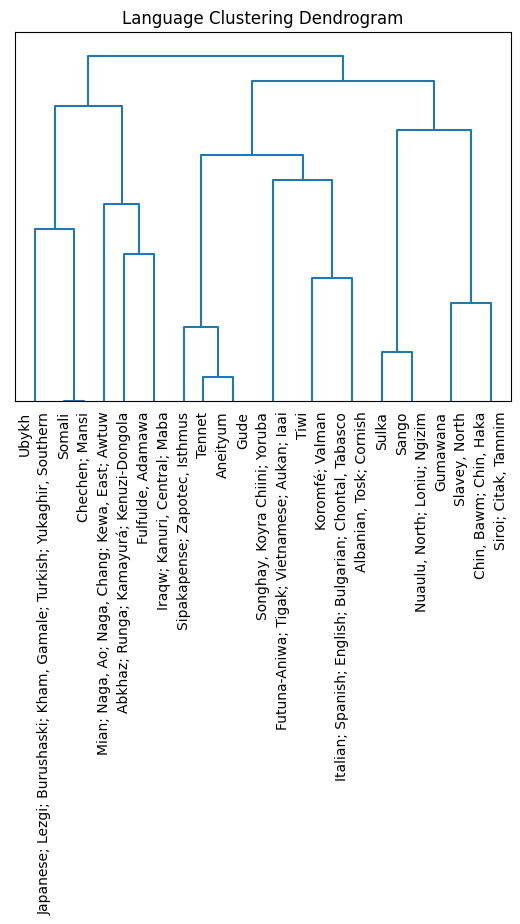

In [39]:
# your code here
from matplotlib import pyplot as plt

plt.title('Language Clustering Dendrogram')

**
```
['English']
['English', 'Bulgarian', 'Chontal, Tabasco']
['Italian', 'Spanish', 'English', 'Bulgarian', 'Chontal, Tabasco']
['Italian', 'Spanish', 'English', 'Bulgarian', 'Chontal, Tabasco', 'Albanian, Tosk', 'Cornish']
...
```
![Clustering](cluster.png)